<a href="https://colab.research.google.com/github/iCristian/datasets/blob/master/dataR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Observaciones Importantes
- Para acceder a R desde Google Colab: https://colab.to/r
- Importante cargar los datos antes de ejecutar los comandos

### Bibliografía a utilizar

- http://www.cookbook-r.com/Manipulating_data/Converting_between_data_frames_and_contingency_tables/#contingency-table-to-cases

- https://rc2e.com/

- https://es.r4ds.hadley.nz/

## Carga de Datos

In [7]:
install.packages("readxl")
install.packages("vcd")
library(readxl)
library(vcd)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



In [8]:
#Carga de archivo
data <- read_xlsx("data.xlsx", sheet = 1)
head(data)

ANO_NAC,TIPO_PARTO,SEMANAS,GRUPO_ETARIO_MADRE,NIVEL_MADRE,URBANO_RURAL,Freq
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015,9,NA,NO ESPECIFICADO,9,1,8
2015,1,25,25 A 29 AÑOS,2,1,11
2015,1,29,20 A 24 AÑOS,4,1,5
2015,1,24,25 A 29 AÑOS,2,2,1
2015,1,40,40 A 44 AÑOS,2,2,46
2015,1,32,NO ESPECIFICADO,2,1,1


## Transformación de Datos

In [13]:
# Convert from data frame of counts to data frame of cases.
# `countcol` is the name of the column containing the counts
countsToCases <- function(x, countcol = "Freq") {   ## Importante la columna de transformación debe declararse aquí o en su defecto renombrarla como se propone
    # Get the row indices to pull from x
    idx <- rep.int(seq_len(nrow(x)), x[[countcol]])

    # Drop count column
    x[[countcol]] <- NULL

    # Get the rows from x
    x[idx, ]
}

### Tablas de Contingencia (resumenes) a casos

In [16]:
casos <- countsToCases(as.data.frame(data))
casos

,ANO_NAC,TIPO_PARTO,SEMANAS,GRUPO_ETARIO_MADRE,NIVEL_MADRE,URBANO_RURAL
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2015,9,NA,NO ESPECIFICADO,9,1
1.1,2015,9,NA,NO ESPECIFICADO,9,1
1.2,2015,9,NA,NO ESPECIFICADO,9,1
1.3,2015,9,NA,NO ESPECIFICADO,9,1
1.4,2015,9,NA,NO ESPECIFICADO,9,1
1.5,2015,9,NA,NO ESPECIFICADO,9,1
1.6,2015,9,NA,NO ESPECIFICADO,9,1
1.7,2015,9,NA,NO ESPECIFICADO,9,1
2,2015,1,25,25 A 29 AÑOS,2,1


## Análisis de Datos

In [15]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Warning message:
“Removed 3617 rows containing missing values (geom_point).”


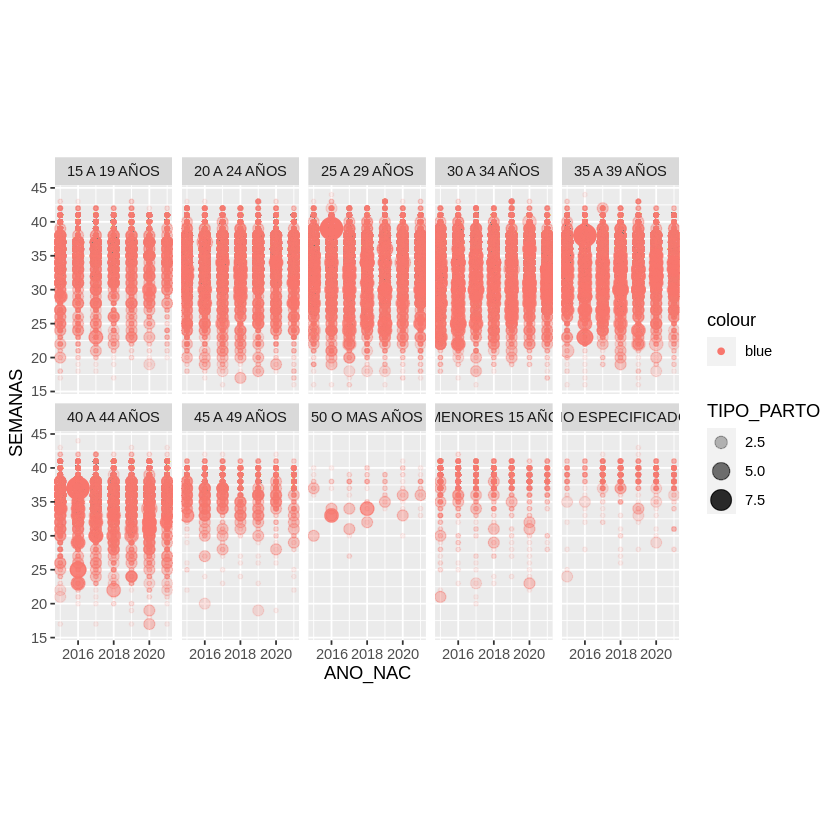

In [40]:
ggplot(data = casos) +
  geom_point(mapping = aes(x = ANO_NAC, y = SEMANAS, size = TIPO_PARTO, alpha = TIPO_PARTO, color = "blue"))+
  facet_wrap(~ GRUPO_ETARIO_MADRE, nrow = 2)

In [48]:
ggsave(filename = 'graph01.png', device='png', dpi=700)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 3617 rows containing missing values (geom_point).”


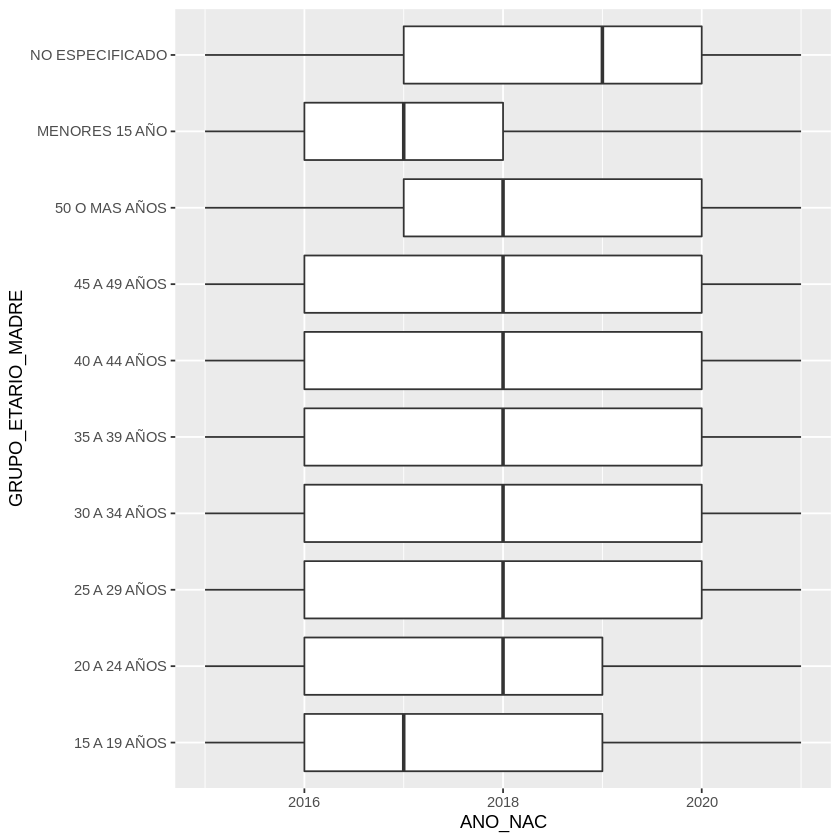

In [65]:
ggplot(casos, aes(x=ANO_NAC, y=GRUPO_ETARIO_MADRE, fill=TIPO_PARTO)) + 
    geom_boxplot()

In [66]:
ggsave(filename = 'graph02.png', device='png', dpi=700)

Saving 6.67 x 6.67 in image



## Exportar a Excel 🤐

In [26]:
install.packages("writexl")
library(writexl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
write_xlsx(casos,"data_casos.xlsx")

ERROR: ignored

Se Excede el máximo permitido de filas (1,048,576 rows by 16,384 columns) el archivo posee 1,501,092 filas con 6 columnas
- https://support.microsoft.com/en-us/office/excel-specifications-and-limits-1672b34d-7043-467e-8e27-269d656771c3

## Exportar a CSV 😎

In [37]:
write.csv(casos, "casos.csv", row.names = FALSE)